In [109]:
import numpy as np
import pandas as pd

In [110]:
df = pd.read_csv('../../../Datasets/iris.csv')

In [111]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
df = df.iloc[:,1:]

In [113]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
encoder = LabelEncoder()

In [116]:
df['Species'] = encoder.fit_transform(df['Species'])

In [117]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


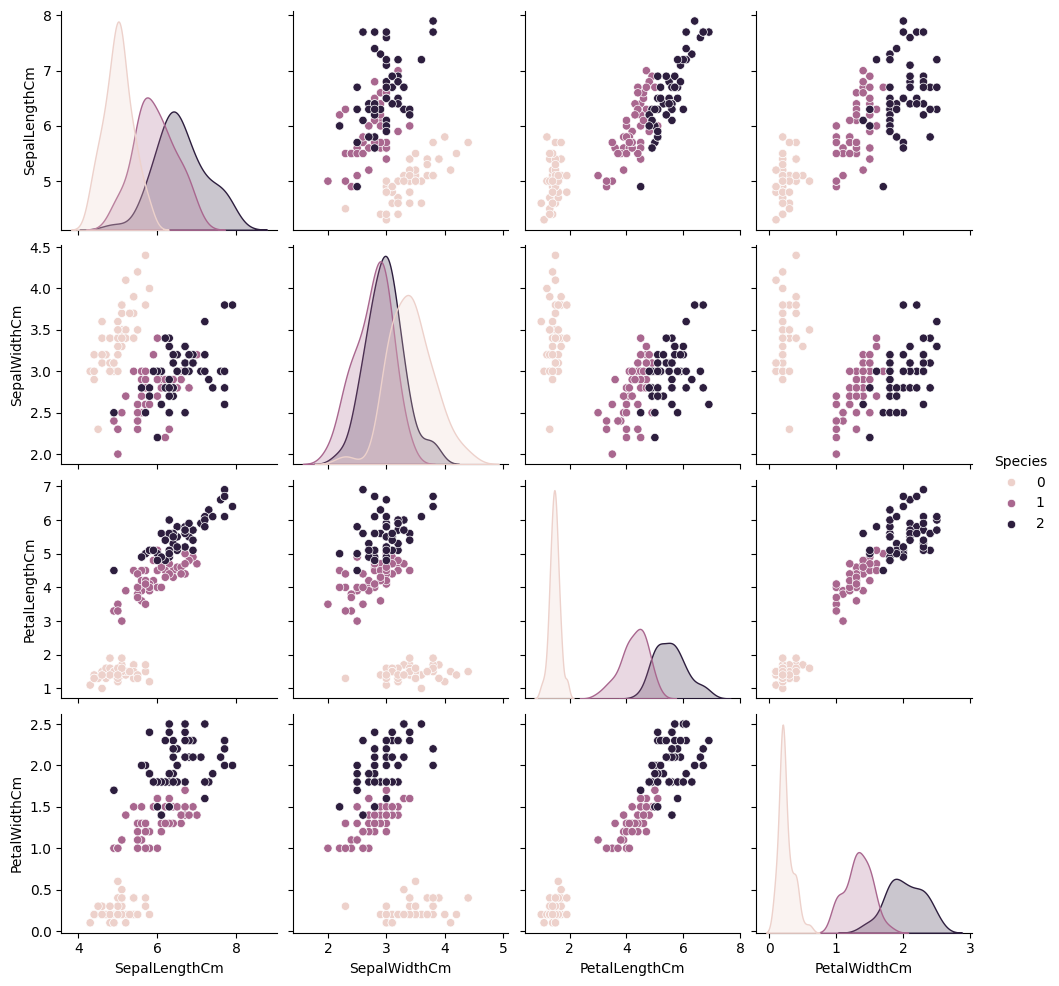

In [118]:
sns.pairplot(df,hue='Species')

In [119]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [120]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

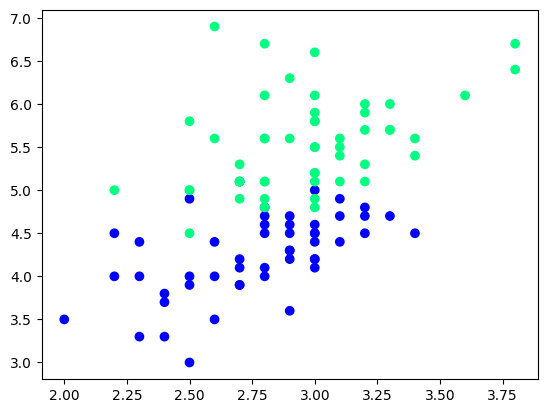

In [122]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [123]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
95,3.0,4.2,1
98,2.5,3.0,1
58,2.9,4.6,1
92,2.6,4.0,1
57,2.4,3.3,1
54,2.8,4.6,1
53,2.3,4.0,1
106,2.5,4.5,2
75,3.0,4.4,1
66,3.0,4.5,1


In [124]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [125]:
df_train

,SepalWidthCm,PetalLengthCm,Species
138,3.0,4.8,2
102,3.0,5.9,2
72,2.5,4.9,1
115,3.2,5.3,2
67,2.7,4.1,1
135,3.0,6.1,2
119,2.2,5.0,2
75,3.0,4.4,1
78,2.9,4.5,1
70,3.2,4.8,1


In [126]:
df_val

,SepalWidthCm,PetalLengthCm,Species
64,2.9,3.6,1
51,3.2,4.5,1
128,2.8,5.6,2
77,3.0,5.0,1
52,3.1,4.9,1


In [127]:
df_test

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
63,2.9,4.7,1
90,2.6,4.4,1
114,2.8,5.1,2
125,3.2,6.0,2


In [128]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [129]:
y_test

array([1, 1, 2, 1, 1])

# Case 1 - Bagging

In [130]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
119,2.2,5.0,2
135,3.0,6.1,2
102,3.0,5.9,2
115,3.2,5.3,2
115,3.2,5.3,2
102,3.0,5.9,2
67,2.7,4.1,1


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [132]:
dt_bag1 = DecisionTreeClassifier()

In [133]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

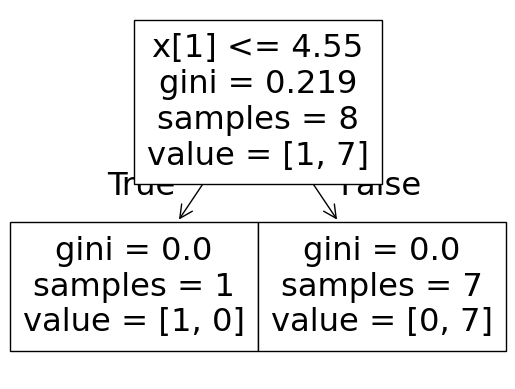

d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


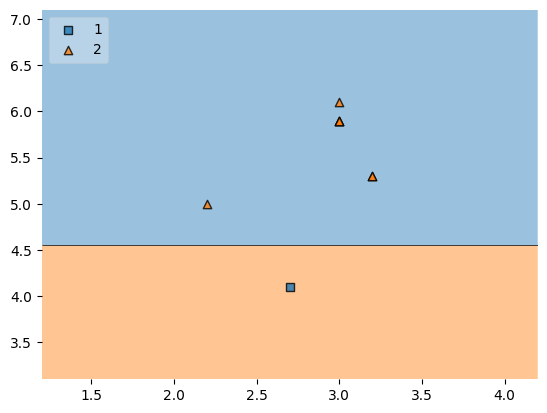

In [134]:
evaluate(dt_bag1,X,y)

In [135]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
102,3.0,5.9,2
75,3.0,4.4,1
119,2.2,5.0,2
115,3.2,5.3,2
135,3.0,6.1,2
119,2.2,5.0,2
75,3.0,4.4,1


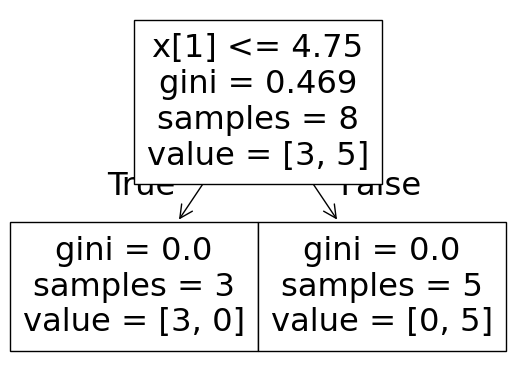

d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


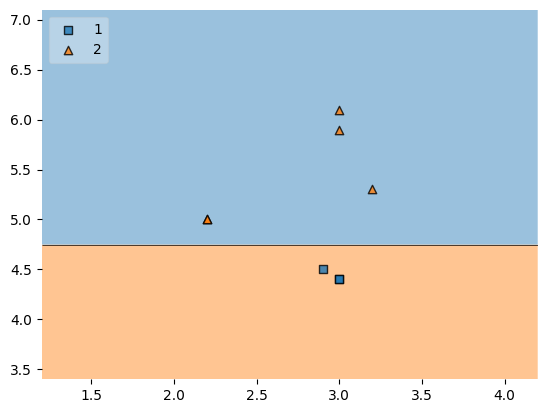

In [136]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [137]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
119,2.2,5.0,2
70,3.2,4.8,1
115,3.2,5.3,2
70,3.2,4.8,1
75,3.0,4.4,1
67,2.7,4.1,1
78,2.9,4.5,1


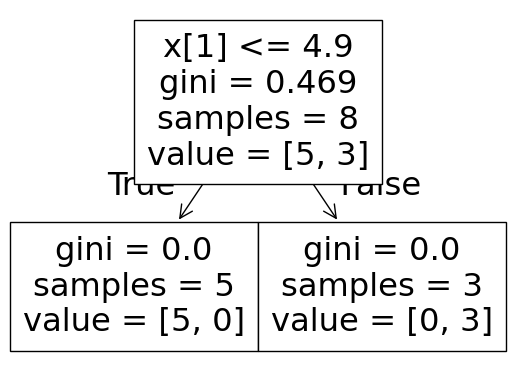

d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


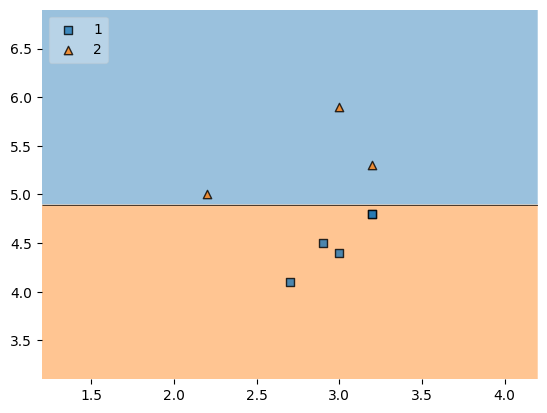

In [138]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [139]:
df_test

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
63,2.9,4.7,1
90,2.6,4.4,1
114,2.8,5.1,2
125,3.2,6.0,2


In [140]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Study\Machine Learning\Learning ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Pasting (This is also the bagging but the difference is that in bagging we use data with replacement and here we use data without replacement.)

In [141]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
138,3.0,4.8,2
102,3.0,5.9,2
72,2.5,4.9,1
115,3.2,5.3,2
67,2.7,4.1,1
135,3.0,6.1,2
119,2.2,5.0,2
75,3.0,4.4,1
78,2.9,4.5,1
70,3.2,4.8,1


In [142]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
67,2.7,4.1,1
138,3.0,4.8,2
135,3.0,6.1,2
75,3.0,4.4,1
115,3.2,5.3,2
70,3.2,4.8,1
102,3.0,5.9,2


### Random Subspaces (here we do column sampling instead of row sampling here with replacement and without replacement both will work) 

In [143]:
df1 = pd.read_csv('../../../Datasets/Iris.csv')
df1 = df1.sample(10)

In [144]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
5,6,5.4,3.9,1.7,0.4,Iris-setosa
133,134,6.3,2.8,5.1,1.5,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [148]:
#axis = 1 means the sampling in col instead of row
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,SepalWidthCm
69,5.6,2.5
13,4.3,3.0
22,4.6,3.6
55,5.7,2.8
68,6.2,2.2
72,6.3,2.5
98,5.1,2.5
5,5.4,3.9
133,6.3,2.8
130,7.4,2.8


### Random Patches (Here we do row sampling and col sampling both)

In [146]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
5,6,5.4,3.9,1.7,0.4,Iris-setosa
133,134,6.3,2.8,5.1,1.5,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [147]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,SepalWidthCm
72,6.3,2.5
13,4.3,3.0
55,5.7,2.8
69,5.6,2.5
72,6.3,2.5
55,5.7,2.8
22,4.6,3.6
55,5.7,2.8
